In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from functools import *

# Logistic Regression

In [3]:
def sigma(z):
    return(1 / (1 + np.exp(-z)))
def tanh(z):
    return((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))
def relu(z):
    return(max(0,z))
def leaky_relu(z):
    return(max(0.01*z,z))

**For one sample tuple**

In [4]:
def LogRegCompute(x_1, x_2, w_1, w_2, b, alpha,y):
    def compute_da(y,a):
        da = -(y/a)+(1-y)/(1-a)
        return da
    def compute_dz(da,a):
        dz = da*a*(1-a)
        return dz
    def compute_d(dz, x=1):
        d = dz * x
        return d
    
    z = w_1*x_1 + w_2*x_2 + b
    a = sigma(z)
    
    da = compute_dz(y,a)
    dz = compute_dz(da,a)
    
    dw1 = compute_d(dz, x_1)
    dw2 = compute_d(dz, x_2)
    db = compute_d(dz)
    
    w_1 = w_1 + alpha*dw1
    w_2 = w_2 + alpha*dw2
    b = b + alpha*db
    return(w_1,w_2,b)

In [5]:
LogRegCompute(1,2,0,0,1,0.01,2)

(0.0007731250458590582, 0.0015462500917181165, 1.0007731250458591)

**For m samples, single step**

In [6]:
m = 1000
J_array, b = np.zeros((m,1)), 0
alpha = 0.01
np.random.seed(197)


w = np.zeros((1,2))
x_1 = np.random.randint(10, size = m).reshape(-1,m)
x_2 = np.random.randint(low = 25, high = 50, size = m).reshape(-1,m)
x = np.array([x_1,x_2]).reshape(2,m)

y = np.where(((x[1]<37.5) & (x[0]>5)), 1, 0)

for i in range(1000):
    z = np.zeros(m)
    a = np.zeros(m)

    z = np.dot(w,x) + b
    a = sigma(z)
    J = (-(y * np.log(a) + (1-y)* np.log(1-a))).mean()
    dz = a - y
    dw = (np.dot(x,dz.T).reshape(-1,2))/m
    db = dz.mean()
    w = w - alpha * dw
    b = b - alpha * db
    J_array[i] = 1-J 

print(f'Accuracy = {J_array[m-1]*100}')

Accuracy = [83.86859737]


Text(0.5, 1.0, 'Accuracy increase over 1000 iterations')

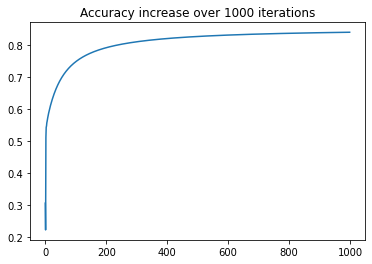

In [7]:
plt.plot(J_array)
plt.title("Accuracy increase over 1000 iterations")

# Neural Network 

In [8]:
m = 1000
J_array, b = np.zeros((m,1)), 0
alpha = 0.01
np.random.seed(197)


w = np.zeros((1,2))
x_1 = np.random.randint(10, size = m).reshape(-1,m)
x_2 = np.random.randint(low = 25, high = 50, size = m).reshape(-1,m)
x = np.array([x_1,x_2]).reshape(2,m)

y = np.where(((x[1]<37.5) & (x[0]>5)), 1, 0).reshape(1,1000)

def init_network():
    hidden_layer_nodes = []
    if(input("Load default input/output layer config: (y/n): ").lower()=='n'):
        input_layer_node = int(input("Enter number of nodes in input layer 0: "))
        n_layer = int(input("Enter number of layers in network: "))
        for i in range(1,n_layer):
            hidden_layer_nodes.append(input(f"Enter no. of nodes in layer {i}"))
        output_layer_node = int(input(f"Enter number of nodes in output layer {n_layer}: "))
    else:
        n_layer = 2
        input_layer_node = 2
        output_layer_node = 1
        hidden_layer_nodes = [4]  
    n__per_layer = [input_layer_node] + hidden_layer_nodes + [output_layer_node] 
    hidden_layers = {}
    for i in range(n_layer+1):
        hidden_layers[f'Layer {i}'] = {'a':np.zeros(shape=(n__per_layer[i],1))}
        if(i != 0):
            hidden_layers[f'Layer {i}']['w'] = np.zeros(shape=(n__per_layer[i],n__per_layer[i-1]))
            hidden_layers[f'Layer {i}']['b'] = np.zeros(shape=(n__per_layer[i],1))
    return(hidden_layers)

def display_net(net, status = "original"):
    print(f'\nStatus: {status}\n')
    for key,value in net.items():
        print(f'{key}:')
        for key,value in value.items():
            print(f'{key}: \n{value}')
def forward_prop(net, x):
    n_layer = f'Layer {len(net)-1}'
    for key,value in net.items():
        if(key!='Layer 0'):
            w = value['w']
            a = value['a']
            b = value['b']
            if(key == n_layer):
                a = sigma(np.dot(w,a_prev) + b)
            else:
                a = np.vectorize(relu)(np.dot(w,a_prev) + b)
            value['a'] = a 
        a_prev = value['a']
    return(net)
def back_prop(net, y, i):
    net = dict(reversed(list(net.items())))
    n_layer = f'Layer {len(net)-1}'
    J_array[i] = (-(y * np.log(net[n_layer]['a']) + (1-y)* np.log(1-net[n_layer]['a']))).mean()
    _net = list(net.items()) 
    dz = [[] for x in range(int(n_layer[-1]))]
    for j in range(len(_net)-1):
        a_curr = _net[j][1]['a']
        
        a_next = _net[j+1][1]['a']
        if(j == 0):
            _dz = a_curr - y
        else:
            w_prev = _net[j-1][1]['w']
            dz_prev = dz[j-1]
            _dz = np.dot(w_prev.T,dz_prev) * a_curr*(1-a_curr)

        dw = np.dot(_dz,a_next.T)/m
        db = _dz.mean(axis = 1, keepdims = True) 
        _net[j][1]['w'] = _net[j][1]['w'] - alpha * dw 
        _net[j][1]['b'] = _net[j][1]['b'] - alpha * db
        dz[j] = _dz
    net = dict(reversed(_net))
    return(net)

net = init_network()
net['Layer 0']['a'] = x

for i in range(1000):
    net = forward_prop(net, x)
    net = back_prop(net,y, i)

display_net(net, "Output")

print(f'Accuracy = {J_array[m-1]*100}')

Load default input/output layer config: (y/n): y

Status: Output

Layer 0:
a: 
[[ 1  3  4 ...  0  9  2]
 [37 36 30 ... 28 26 35]]
Layer 1:
a: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
w: 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
b: 
[[0.]
 [0.]
 [0.]
 [0.]]
Layer 2:
a: 
[[0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766
  0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766
  0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766
  0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766
  0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766
  0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766
  0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766
  0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766
  0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766 0.2361766
  0.2361766 0.2361766 0.2361766 0.2361766 0.23617